"""
# Objetivo:
Quieren desarrollar un modelo que pueda analizar el comportamiento 
de los clientes y recomendar uno de los nuevos planes de Megaline: 
Smart o Ultra. (Modelo Categorico). La data ya fue previamente tratada.


    - Superar un umbral de exactitud del 75%


#### 1 - Carcar Datos

In [1]:
# Librerias

# Para manejo de datos
import pandas as pd
import numpy as np

# Para Graficar
import matplotlib.pyplot as plt

# Para modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrcia de Exactitud
from sklearn.metrics import accuracy_score

In [2]:
# Carga de datos:
df = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 10/users_behavior.csv')

df.info()
display(df.describe())
display(df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.9,83.0,19915.42,0


#### 2 - Segmentar Datos

In [3]:
"""Aqui segmentos los datos para entrenamiento y validacion"""
# Para el entrenamiento ocupare el ratio 6:2:2

# Entrenamiento = 60%
train, temp = train_test_split(df,test_size= 0.40,random_state= 12345)
print(f'Observaciones en Entrenamiento = {train.shape}')

# Validacion y prueba  20% y 20% del total
validacion, prueba = train_test_split(temp,test_size=0.5,random_state=12345)
print(f'Observaciones en Validaciones = {validacion.shape}, Observaciones en Prueba = {prueba.shape}')

# Aqui segmentos los datos entre respuestas y caracteristicas
train_features = train.drop(['is_ultra'], axis=1)
train_target = train['is_ultra']

val_features = validacion.drop(['is_ultra'], axis=1)
val_target = validacion['is_ultra']

prueba_features = prueba.drop(['is_ultra'], axis=1)
prueba_target = prueba['is_ultra']

Observaciones en Entrenamiento = (1928, 5)
Observaciones en Validaciones = (643, 5), Observaciones en Prueba = (643, 5)


#### 3 - Calidad de Modelos con diferentes hiperparametros

Profundidad: 1, Puntaje: 0.7542768273716952
Profundidad: 2, Puntaje: 0.7822706065318819
Profundidad: 3, Puntaje: 0.7853810264385692
Profundidad: 4, Puntaje: 0.7791601866251944
Profundidad: 5, Puntaje: 0.7791601866251944
Profundidad: 6, Puntaje: 0.7838258164852255
Profundidad: 7, Puntaje: 0.7822706065318819
Profundidad: 8, Puntaje: 0.7791601866251944
Profundidad: 9, Puntaje: 0.7822706065318819
Profundidad: 10, Puntaje: 0.7744945567651633



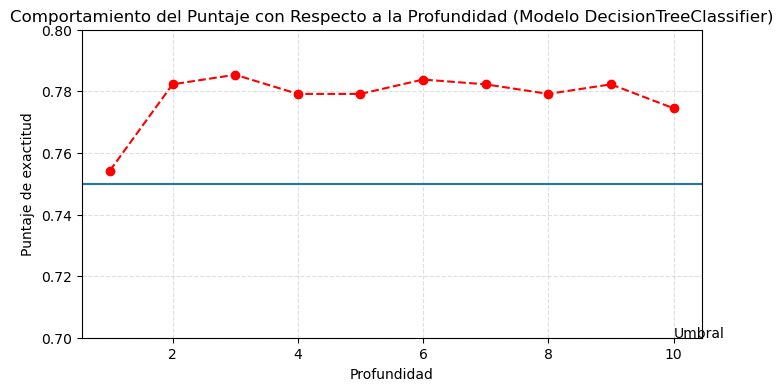

El mejor puntaje de exactitud "Datos Validacion" es 0.7853810264385692 con una profundidad de 3
Puntaje del modelo entrenado: 0.8075726141078838
El sobreajuste es minimo, este modelo es un buen candidato


In [7]:
# Modelo 1 - DecisionTreeClassifier

umbral = 0.75
best_depth = 0
best_score = 0
best_train_score_1 = 0

x=[]
y=[]

# Iteracion y creacion del modelo:
for profu in range(1,11):
    modelo_1 = DecisionTreeClassifier(random_state=12345, max_depth=profu)
    # Entrenamiento
    modelo_1.fit(train_features, train_target)
    train_predict_1 = modelo_1.predict(train_features)
    prediccion_1 = modelo_1.predict(val_features)
    # Scoring
    score_1 = accuracy_score(val_target, prediccion_1)
    train_score_1 = accuracy_score(train_target, train_predict_1)

    x.append(profu)
    y.append(score_1)
    
    print(f'Profundidad: {profu}, Puntaje: {score_1}')
    if score_1 > umbral and score_1 > best_score:
        best_depth = profu
        best_score = score_1
        best_train_score_1 = train_score_1

print()

plt.figure(figsize=(8,4))
plt.plot(np.array(x),np.array(y),marker='o',linestyle='--',color='red')
plt.grid(linestyle='--',alpha=0.4)
plt.ylim(0.7,0.8)
plt.ylabel('Puntaje de exactitud')
plt.xlabel('Profundidad')
plt.title('Comportamiento del Puntaje con Respecto a la Profundidad (Modelo DecisionTreeClassifier)')
plt.axhline(y=0.75)
plt.annotate('Umbral',xy=([10,0.7]))
plt.show()

print(f'El mejor puntaje de exactitud "Datos Validacion" es {best_score} con una profundidad de {best_depth}')
print(f'Puntaje del modelo entrenado: {best_train_score_1}')
print('El sobreajuste es minimo, este modelo es un buen candidato')

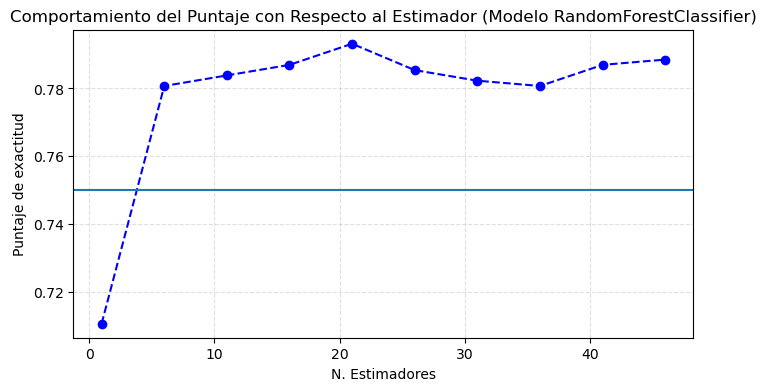


Mejor estimador: 21, Mejor Puntaje de Exactitud "Datos Validacion": 0.7931570762052877
Puntaje de Exactitud del modelo Entrenado: 0.9922199170124482
La calidad del modelo comenza a empeorar al superar los 30 arboles
Sin duda este modelo esta dando sobreajuste incluso en su mejor numero de estimador


In [8]:
# Modelo 2 - RandomForestClassifier

umbral = 0.75
best_estimator = 0
best_score = 0
best_train_score_2 = 0

# Iteracion y creacion del modelo
# Tomare hasta 50 estimators siendo estos la mitad del limite de 100 arboles. Haciendo saltos de 10 en 10 para 
# mantener la eficiencia.
x  = []
y = []

for est in range(1,51,5):
    modelo_2 = RandomForestClassifier(n_estimators=est, random_state=12345)
    # Entrenamiento
    modelo_2.fit(train_features, train_target)
    train_predict_2 =modelo_2.predict(train_features)
    prediccion_2 = modelo_2.predict(val_features)
    # Scoring
    score_2 = accuracy_score(val_target, prediccion_2)
    train_score_2 = accuracy_score(train_target, train_predict_2)
    x.append(est)
    y.append(score_2)

    if score_2 > umbral and score_2 > best_score:
        best_estimator = est
        best_score = score_2
        best_train_score_2 = train_score_2

plt.figure(figsize=(8,4))
plt.plot(np.array(x),np.array(y),marker='o',linestyle='--',color='blue')
plt.grid(linestyle='--',alpha=0.4)
plt.ylabel('Puntaje de exactitud')
plt.xlabel('N. Estimadores')
plt.title('Comportamiento del Puntaje con Respecto al Estimador (Modelo RandomForestClassifier)')
plt.axhline(y=0.75)
plt.annotate('Umbral',xy=([10,0.7]))
plt.show()

print()
print(f'Mejor estimador: {best_estimator}, Mejor Puntaje de Exactitud "Datos Validacion": {best_score}')
print(f'Puntaje de Exactitud del modelo Entrenado: {best_train_score_2}')
print('La calidad del modelo comenza a empeorar al superar los 30 arboles')
print('Sin duda este modelo esta dando sobreajuste incluso en su mejor numero de estimador')

Puntaje del modelo "Datos Validacion": 0.7091757387247278


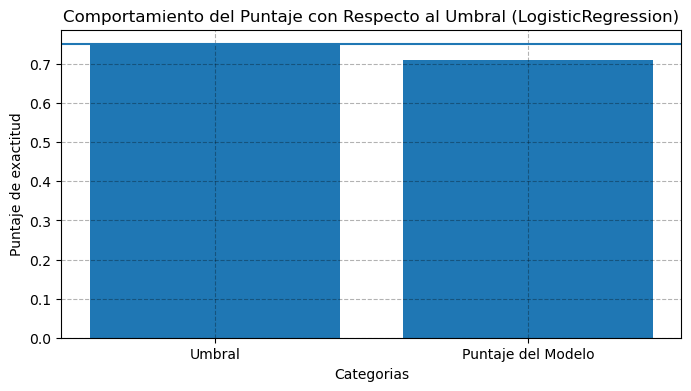

In [19]:
# Modelo 3 - LogisticRegression

# Creacion del modelo
modelo_3 = LogisticRegression(random_state=12345, solver='liblinear')
modelo_3.fit(train_features, train_target)

modelo_3_prediccion = modelo_3.predict(val_features)
score_valid = accuracy_score(val_target,modelo_3_prediccion)

print(f'Puntaje del modelo "Datos Validacion": {score_valid}')

plt.figure(figsize=(8,4))
plt.bar(np.array(['Umbral','Puntaje del Modelo']),np.array([0.75,score_valid]))
plt.grid(linestyle='--',alpha=0.3,color='black')
plt.ylabel('Puntaje de exactitud')
plt.xlabel('Categorias')
plt.title('Comportamiento del Puntaje con Respecto al Umbral (LogisticRegression)')
plt.axhline(y=0.75)
plt.annotate('Umbral',xy=([10,0.7]))
plt.show()

1. El modelo_1 y modelo_3 dieron el mejor puntaje en contraste con el puntaje de entrenamiento el primero con una diferencia de 2% y el ultimo con una diferencia del 1%.
2. El modelo_2 "RandomForest" sufrio un sobreajuste del 20% lo cual lo hace mas difil de ser considerado buena opcion en esta tare.
3. Sin embargo el modelo_3 no supero el umbral deseado del 75%, por tanto el mejor modelo para ser aplicado con los datos de prueba es elmodelo_1 "DecisionTree".

#### 4 - Poner a Prueba el modelo con el restante 20% de los datos

In [20]:
# Union de los datos train y validacion para tener un entrenamiento del nuevo modelo mas robusto:
new_features = pd.concat([train_features, val_features], axis=0, ignore_index=True)
new_targets = pd.concat([train_target, val_target], axis=0, ignore_index=True)

# Creacion del modelo con la mejor profundidad:
mejor_profundidad = 3

modelo_a_prueba = DecisionTreeClassifier(random_state=12345, max_depth=mejor_profundidad)
modelo_a_prueba.fit(new_features, new_targets)

prediccion_prueba = modelo_a_prueba.predict(prueba_features)
score_prueba = accuracy_score(prueba_target, prediccion_prueba)

print(score_prueba)
print(f'El score de la prueba es: {score_prueba*100:.2f}%')
print('El modelo funciona y ademas con una exactitud del 77%, un 2% mas de lo establecido por el umbral del 75%')

0.776049766718507
El score de la prueba es: 77.60%
El modelo funciona y ademas con una exactitud del 77%, un 2% mas de lo establecido por el umbral del 75%


#### 5 - Prueba de Cordura

In [16]:
# La evaluacion la hare con datos creados, que distinguen bien la logica de plan ultra = 1 y plan Smart = 0
# el modelo debera regresar [0,0,1,1,0] como prediccion:

data = {'calls':[20.0, 30.0, 150.0, 80.0, 25.0],
        'minutes':[200.0, 300.0, 1000.0, 550.0, 160.0],
        'messages':[20.0, 30.0, 50.0, 50.0, 10.0],
        'mb_used':[20000.0, 15000.0, 30000.0, 31500.0, 16800.0],
        'is_ultra':[0, 0, 1, 1, 0]
       }
df = pd.DataFrame(data)
print(df)

cordura_features = df.drop(['is_ultra'], axis=1)
cordura_target = df['is_ultra']

prediccion_cordura = modelo_a_prueba.predict(cordura_features)
print()
print(f'Predicciones de la Prueba de Cordura: {prediccion_cordura}')
print(f'Respuestas de los datos de la prueba de Cordura: {cordura_target.values}')

   calls  minutes  messages  mb_used  is_ultra
0   20.0    200.0      20.0  20000.0         0
1   30.0    300.0      30.0  15000.0         0
2  150.0   1000.0      50.0  30000.0         1
3   80.0    550.0      50.0  31500.0         1
4   25.0    160.0      10.0  16800.0         0

Predicciones de la Prueba de Cordura: [0 0 1 1 0]
Respuestas de los datos de la prueba de Cordura: [0 0 1 1 0]
